In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
df=pd.read_csv("C:/Users/dhivy/Downloads/bank.csv")

In [7]:
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [9]:
df['sex'].value_counts()

FEMALE    300
MALE      300
Name: sex, dtype: int64

In [20]:
convert={"sex":{"FEMALE":0,"MALE":1},
         "region":{"INNER_CITY":0,"TOWN":1,"RURAL":2,"SUBURBAN":3},
         "married":{"YES":1,"NO":0},
         "car":{"YES":1,"NO":0},
         "save_act":{"YES":1,"NO":0},
         "current_act":{"YES":1,"NO":0},
         "mortgage":{"YES":1,"NO":0}}

In [21]:
df=df.replace(convert)

In [22]:
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,0,0,17546.00,0,1,0,0,0,0,YES
1,ID12102,40,1,1,30085.10,1,3,1,0,1,1,NO
2,ID12103,51,0,0,16575.40,1,0,1,1,1,0,NO
3,ID12104,23,0,1,20375.40,1,3,0,0,1,0,NO
4,ID12105,57,0,2,50576.30,1,0,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,0,0,47025.00,0,2,1,1,1,1,NO
596,ID12697,30,0,0,9672.25,1,0,1,1,1,0,NO
597,ID12698,31,0,1,15976.30,1,0,1,1,0,0,YES
598,ID12699,29,1,0,14711.80,1,0,0,1,0,1,NO


In [23]:
xc=['age','sex','region','income','married','children','car','save_act','current_act','mortgage']
y=['YES','NO']
all_inputs=df[xc]
all_classes=df['pep']

In [24]:
(x_train,x_test,y_train,y_test)=train_test_split(all_inputs,all_classes,train_size=0.7)

In [25]:
clf=DecisionTreeClassifier(random_state=0)

In [26]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
score=clf.score(x_test,y_test)
print(score)

0.7722222222222223


In [36]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz


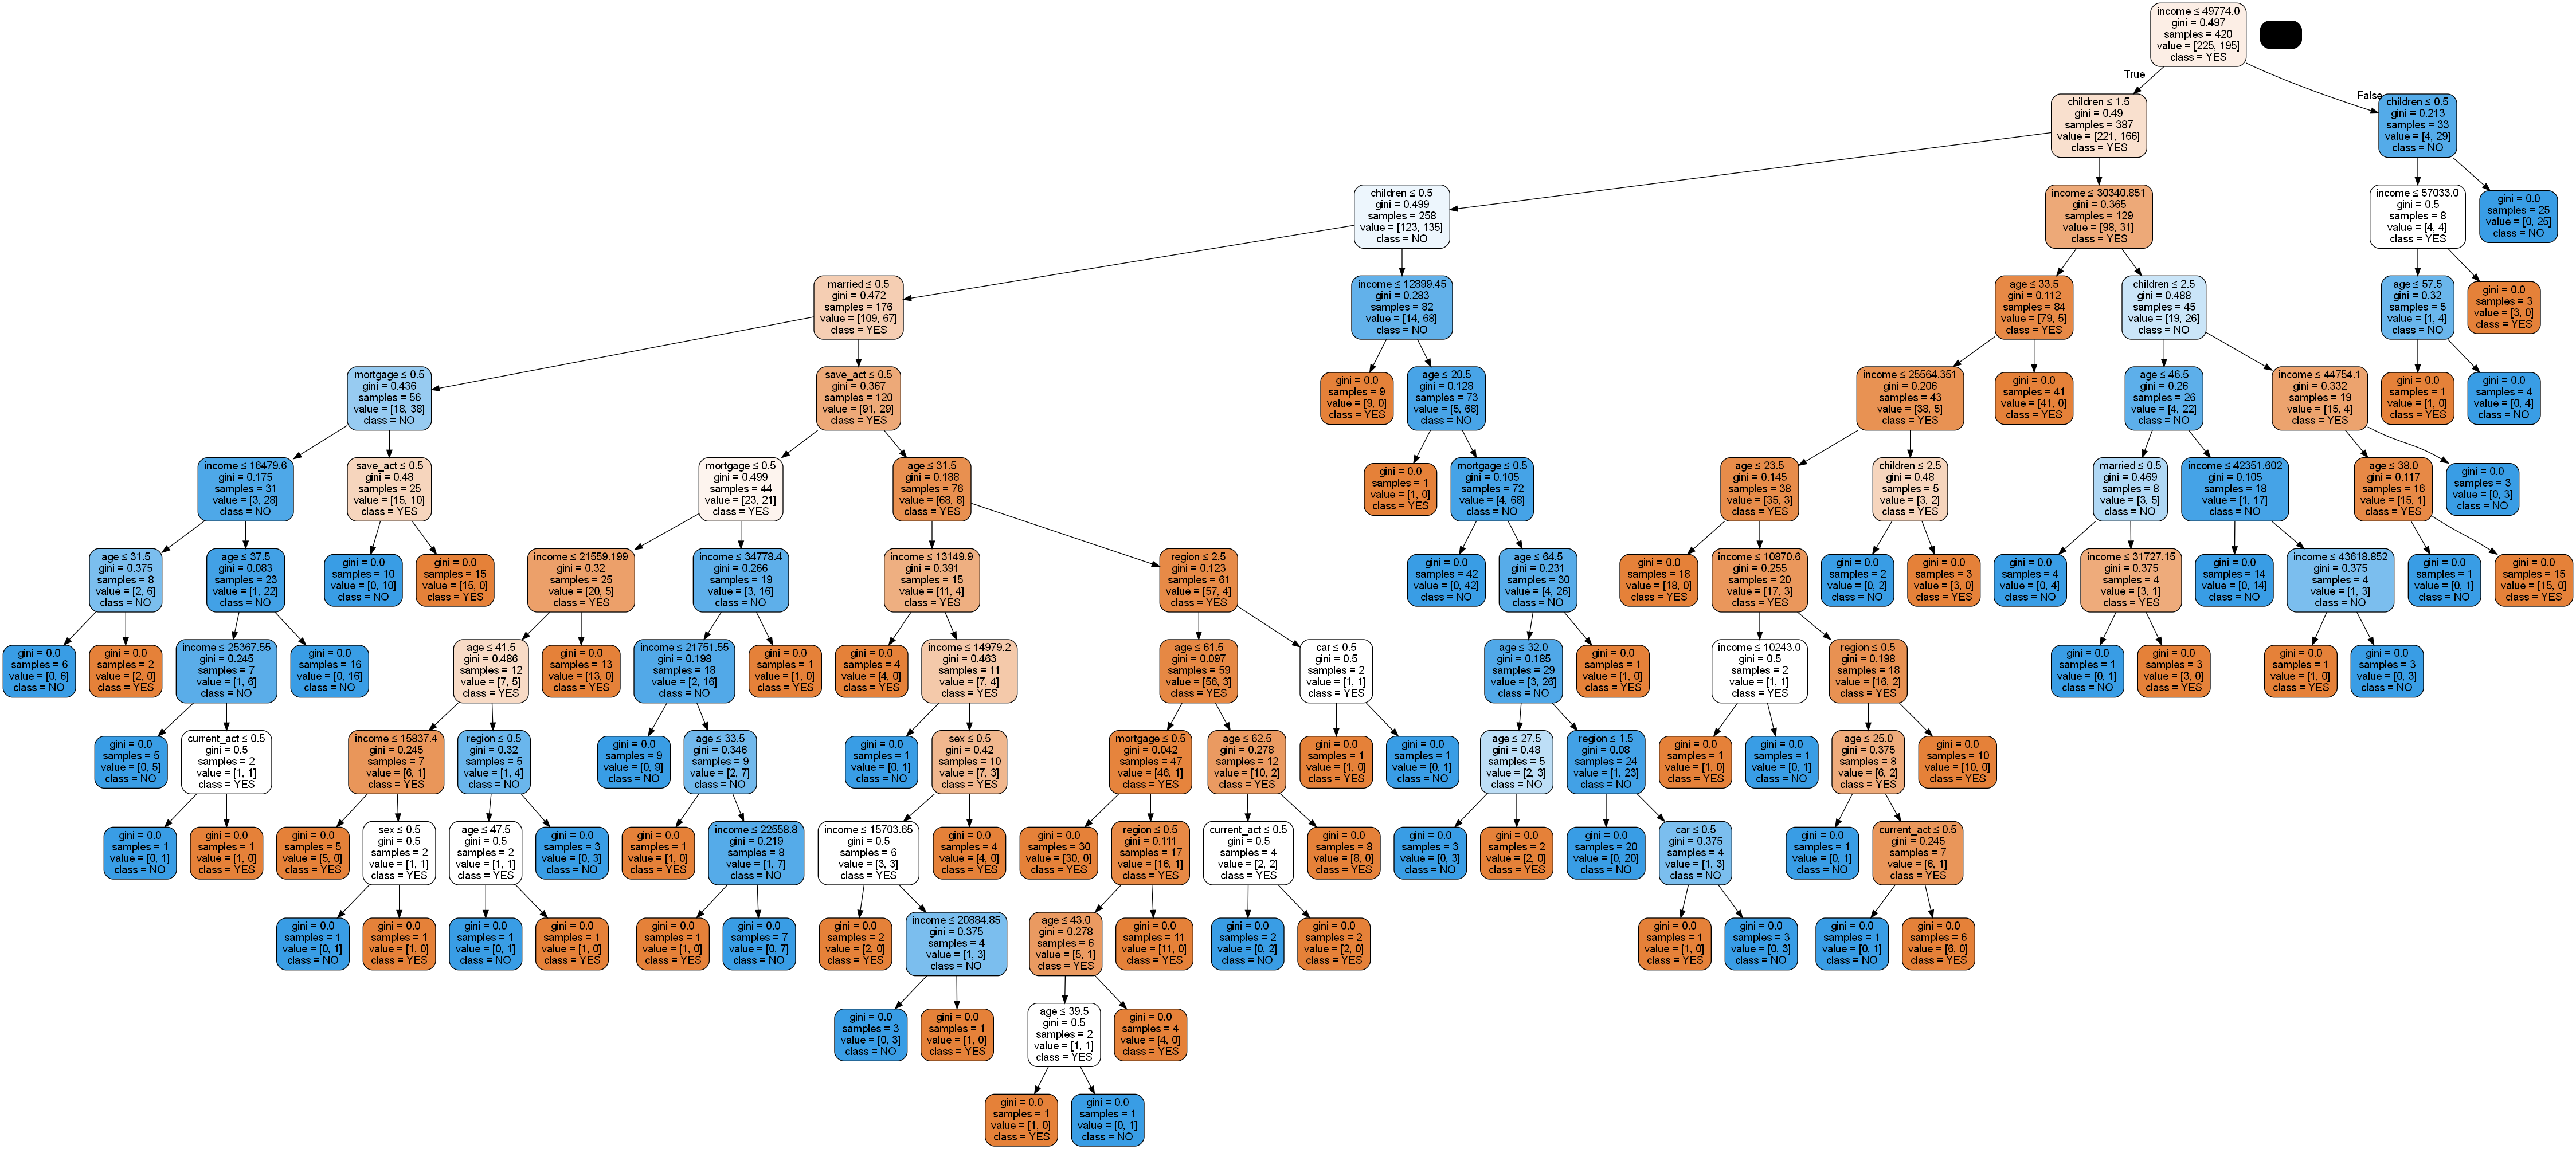

In [39]:
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data, filled=True,rounded=True,special_characters=True,feature_names=xc,class_names=y)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bankTreeTrain.png')
Image(graph.create_png())